In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [168]:
df = pd.read_csv('MNIST.csv')

In [170]:
df.shape

(20000, 785)

In [172]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
X = df.iloc[:,1:784]
Y = df.iloc[:,0]

In [176]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
print(X.shape)
print(Y.shape)

(20000, 783)
(20000,)


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [182]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [184]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [186]:
pca.components_.shape

(2, 783)

In [188]:
df1 = pd.DataFrame(X_train_trf, columns=['pc1', 'pc2'])
df2 = pd.DataFrame(X_test_trf, columns=['pc1','pc2'])

In [192]:
df1.head()

,pc1,pc2
0,409.887655,-255.215258
1,-44.458934,-469.895008
2,-639.679561,-378.584285
3,871.958924,-634.341938
4,-234.528220,-40.943447


In [194]:
X = pd.concat([df1, df2])

In [196]:
X.head()

,pc1,pc2
0,409.887655,-255.215258
1,-44.458934,-469.895008
2,-639.679561,-378.584285
3,871.958924,-634.341938
4,-234.528220,-40.943447


In [198]:
X.shape

(20000, 2)

In [218]:
Y = df['label']
Y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [204]:
clf = LogisticRegression(multi_class='multinomial')

In [206]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [208]:
y_pred = clf.predict(X_test)

In [210]:
print(accuracy_score(y_test, y_pred))

0.1055


In [214]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4,5,6,7,8,9
0,0,340,0,0,0,0,0,11,0,26
1,0,388,0,0,0,0,0,18,0,25
2,0,330,0,0,0,0,0,13,0,25
3,0,404,0,0,0,0,0,10,0,31
4,0,381,0,0,0,0,0,13,0,27
5,0,307,0,0,0,0,0,8,0,32
6,0,384,0,0,0,0,0,17,0,21
7,0,383,0,0,0,0,0,9,0,14
8,0,347,0,0,0,0,0,16,0,22
9,0,355,0,0,0,0,0,18,0,25


C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\yasir\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


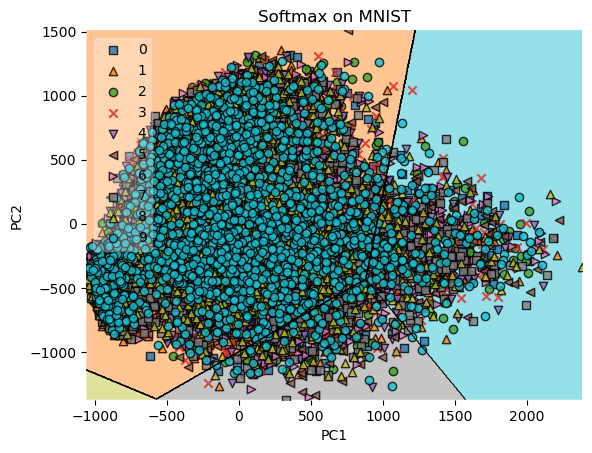

In [224]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, Y.values, clf, legend=2)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Softmax on MNIST')

plt.show()